Import stuff

In [308]:
import numpy as np
import pandas as pd

Read data

In [309]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,Event,Date,Location,Disease,Death toll (estimate),Ref.
0,0,1350 BC plague of Megiddo,1350 BC,"Megiddo, land of Canaan","Amarna letters EA 244, Biridiya, mayor of Megi...",Unknown,[26]
1,1,Plague of Athens,430–426 BC,"Greece, Libya, Egypt, Ethiopia","Unknown, possibly typhus, typhoid fever or vir...","75,000–100,000",[27][28][29][30]
2,2,412 BC epidemic,412 BC,"Greece (Northern Greece, Roman Republic)","Unknown, possibly influenza",Unknown,[31]
3,3,Antonine Plague,165–180 (possibly up to 190),Roman Empire,"Unknown, possibly smallpox",5–10 million,[32][33]
4,4,Jian'an Plague,217,Han Dynasty,"Unknown, possibly typhoid fever or viral hemor...",Unknown,[34][35]


In [310]:
df['Disease'].unique()

array(['Amarna letters EA 244, Biridiya, mayor of Megiddo complains to Amenhotep III of his area being "consumed by death, plague and dust"',
       'Unknown, possibly typhus, typhoid fever or viral hemorrhagic fever',
       'Unknown, possibly influenza', 'Unknown, possibly smallpox',
       'Unknown, possibly typhoid fever or viral hemorrhagic fever',
       'Bubonic plague', 'Smallpox',
       'Bubonic plague Yersinia pestis bacterium',
       'Unknown, possibly an unknown species of hantavirus', 'Typhus',
       'Influenza', 'Possibly Salmonella enterica', 'Measles', 'Malaria',
       'Unknown, possibly leptospirosis with Weil syndrome. Classic explanations include yellow fever, bubonic plague, influenza, smallpox, chickenpox, typhus, and syndemic infection of hepatitis B and hepatitis D',
       'Smallpox and Influenza', 'Yellow fever', 'Diphtheria',
       'Dengue fever', 'Cholera', 'Malaria, possibly other diseases too',
       'Measles, whooping cough, dysentery and influenza',

In [311]:
disease_mapping = {
    'Plague': ['Bubonic plague', 'Pneumonic plague', 'Bubonic plague Yersinia pestis bacterium'],
    'Influenza': ['Influenza', 'Influenza A virus subtype H1N1 H1N1 virus', 'Influenza A virus subtype H2N2',
                  'Influenza A virus subtype H3N2 H3N2 virus', 'Influenza A virus subtype H3N2',
                  'Influenza A virus subtype H1N1', 'Influenza A virus subtype H5N1', 'Influenza A virus subtype H7N9'],
    'Smallpox': ['Smallpox', 'Smallpox and Influenza'],
    'Typhus': ['Typhus'],
    'Cholera': ['Cholera', 'Cholera (El Tor strain)', 'Cholera (strain serogroup O1, serotype Ogawa)'],
    'Measles': ['Measles'],
    'Malaria': ['Malaria'],
    'Hepatitis': ['Hepatitis', 'Hepatitis A', 'Hepatitis B'],
    'Dengue fever': ['Dengue fever'],
    'Yellow fever': ['Yellow fever'],
    'Diphtheria': ['Diphtheria'],
    'Scarlet fever': ['Scarlet fever'],
    'Typhoid fever': ['Typhoid fever'],
    'African trypanosomiasis': ['African trypanosomiasis'],
    'Kuru': ['Kuru'],
    'Pneumonic plague': ['Pneumonic plague'],
    'Encephalitis lethargica': ['Encephalitis lethargica'],
    'Poliomyelitis': ['Poliomyelitis'],
    'Psittacosis': ['Psittacosis'],
    'Relapsing fever': ['Relapsing fever'],
    'Anthrax': ['Anthrax'],
    'HIV/AIDS': ['HIV/AIDS Human immunodeficiency virus'],
    'Bubonic and Pneumonic plague': ['Bubonic plague and Pneumonic plague'],
    'Variant Creutzfeldt–Jakob disease': ['Variant Creutzfeldt–Jakob disease / vCJD'],
    'Meningitis': ['Meningitis'],
    'Nipah virus infection': ['Nipah virus infection'],
    'Marburg virus': ['Marburg virus'],
    'SARS': ['Severe acute respiratory syndrome / SARS'],
    'Ebola': ['Ebola', 'Ebola Ebola virus virion'],
    'Rift Valley fever': ['Rift Valley fever'],
    'Q-fever': ['Q-fever'],
    'Hand, foot, and mouth disease': ['Hand, foot, and mouth disease'],
    'Middle East respiratory syndrome': ['Middle East respiratory syndrome / MERS-CoV'],
    'Chikungunya': ['Chikungunya'],
    'Legionnaires\' disease': ['Legionnaires\' disease'],
    'Hepatitis E': ['Primarily Hepatitis E, but also Hepatitis A'],
    'Zika virus': ['Zika virus'],
    'Japanese encephalitis': ['Japanese encephalitis'],
    'New Delhi metallo-beta-lactamase-producing Carbapenem-resistant enterobacteriaceae': ['New Delhi metallo-beta-lactamase-producing Carbapenem-resistant']
}


# Function to map diseases to their corresponding category
def map_disease_category(disease):
    for category, diseases in disease_mapping.items():
        if disease in diseases:
            return category
    return 'Other'  # Assign 'Other' for remaining diseases

df['Disease Category'] = df['Disease'].apply(map_disease_category)
df['Disease Category'].unique()

array(['Other', 'Plague', 'Smallpox', 'Typhus', 'Influenza', 'Measles',
       'Malaria', 'Yellow fever', 'Diphtheria', 'Dengue fever', 'Cholera',
       'Typhoid fever', 'Scarlet fever', 'African trypanosomiasis',
       'Kuru', 'Encephalitis lethargica', 'Poliomyelitis', 'Psittacosis',
       'Relapsing fever', 'Anthrax', 'HIV/AIDS', 'Hepatitis',
       'Bubonic and Pneumonic plague',
       'Variant Creutzfeldt–Jakob disease', 'Meningitis',
       'Nipah virus infection', 'Marburg virus', 'SARS', 'Ebola',
       'Rift Valley fever', 'Q-fever', 'Hand, foot, and mouth disease',
       'Middle East respiratory syndrome', 'Chikungunya',
       "Legionnaires' disease", 'Hepatitis E', 'Zika virus',
       'Japanese encephalitis'], dtype=object)

In [312]:
df['Disease Category'].values

array(['Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Plague',
       'Plague', 'Plague', 'Plague', 'Plague', 'Plague', 'Smallpox',
       'Plague', 'Plague', 'Other', 'Typhus', 'Influenza', 'Smallpox',
       'Other', 'Influenza', 'Smallpox', 'Plague', 'Other', 'Plague',
       'Measles', 'Plague', 'Plague', 'Plague', 'Malaria', 'Plague',
       'Other', 'Plague', 'Plague', 'Smallpox', 'Smallpox', 'Plague',
       'Plague', 'Plague', 'Yellow fever', 'Plague', 'Plague', 'Plague',
       'Plague', 'Plague', 'Plague', 'Smallpox', 'Plague', 'Plague',
       'Other', 'Yellow fever', 'Yellow fever', 'Yellow fever',
       'Smallpox', 'Smallpox', 'Plague', 'Measles', 'Plague', 'Smallpox',
       'Yellow fever', 'Influenza', 'Smallpox', 'Diphtheria', 'Plague',
       'Smallpox', 'Yellow fever', 'Plague', 'Measles', 'Smallpox',
       'Yellow fever', 'Smallpox', 'Plague', 'Measles', 'Plague',
       'Influenza', 'Smallpox', 'Dengue fever', 'Smallpox', 'Smallpox',
       'Yellow fever',

In [313]:
df['Is death toll unknown'] = df['Death toll (estimate)'].apply(lambda x: True if (isinstance(x, str) and len(x) >= 7 and x[:7] == 'Unknown') else False)
df['Is death toll unknown'].unique()

array([ True, False])

In [314]:
#get the Death toll (estimate) column. show all unique values
df['Death toll (estimate)'].unique()


array(['Unknown', '75,000–100,000', '5–10 million', '310000',
       '15–100 million', '25,000+', '2 million',
       '75–200 million (30–60% of European population)', '10,000+',
       '17000', 'Unknown, around 1% of those infected',
       '5–8 million (40% of population)',
       '5–15 million (80% of population)',
       'Unknown (20–25% of native population)', '20,100+',
       '2–2.5 million (50% of population)', '5,000–9,000', '3000',
       '19,900+', '600,000–700,000', '40000',
       'Unknown (estimated 30–90% of population)', '1 million', '13712',
       '1000', '15,000–25,000', '10400', '200,000+', '500000', '1250000',
       '24148', '100000', '11300', '750–1,000', '76000', '83000',
       '3,100+', '520 (300 in Charleston, 220 in Philadelphia)', '500',
       '1300', '18,000+ (36% of population)', '164000', '100,000+', '844',
       '2200', '20000', '50000', '7,700–11,700', '40,000–50,000',
       '730–940', '8000', '1080', '11,000+',
       'Unknown (50–70% of native pop

In [315]:
import pandas as pd

def replace_with_mean_ignore(df, column_name):
    # convert to numeric
    df[column_name] = df[column_name].astype(int)
    filtered_values = df[df[column_name] != 4000000][column_name]
    mean = filtered_values.mean()
    df.loc[df[column_name] == 4000000, column_name] = mean
    df[column_name] = df[column_name].astype(int)
    return df


In [316]:
import pandas as pd

def convert_string_values_to_int(df, column_name):
    # all values to string
    df[column_name] = df[column_name].astype(str)
    for i, value in enumerate(df[column_name]):
        if value == "Unknown":
            df.loc[i, column_name] = 4000000
        elif value == "75,000–100,000":
            df.loc[i, column_name] = 80000
        elif value == "5–10 million":
            df.loc[i, column_name] = 7500000
        elif value == "310000":
            df.loc[i, column_name] = 310000
        elif value == "15–100 million":
            df.loc[i, column_name] = 58000000
        elif value == "25,000+":
            df.loc[i, column_name] = 25000
        elif value == "2 million":
            df.loc[i, column_name] = 2000000
        elif value == "75–200 million (30–60% of European population)":
            df.loc[i, column_name] = 110000000
        elif value == "10,000+":
            df.loc[i, column_name] = 10000
        elif value == "17000":
            df.loc[i, column_name] = 17000
        elif "Unknown" in value or "Estimated" in value:
            df.loc[i, column_name] = 4000000
        elif "around" in value:
            df.loc[i, column_name] = int(value.split(" ")[-1].replace(",", ""))
        elif "[" in value:
            df.loc[i, column_name] = int(value.split("[")[0].replace(",", ""))
        elif "million" in value:
            if "–" in value:
                df.loc[i, column_name] = int(float(value.split("–")[0].replace(",", "")) * 1000000)
            else:
                df.loc[i, column_name] = int(float(value.split(" ")[0].replace(",", "")) * 1000000)
        elif "thousand" in value:
            df.loc[i, column_name] = int(float(value.split(" ")[0].replace(",", "")) * 1000)
        elif "+" in value:
            if "–" in value:
                 df.loc[i, column_name] = int(value.split("–")[0].replace(",", ""))
            else:
                df.loc[i, column_name] = int(value.split("+")[0].replace(",", ""))
        elif "–" in value:
            values = value.split("–")
            df.loc[i, column_name] = int((float(values[0].replace(",", "")) + float(values[1].replace(",", ""))) / 2)
        elif "(" in value:
            if ":" in value:
                value = value.split(":")[1]
                df.loc[i, column_name] = int(value.split("(")[0].replace(",", ""))
            else:
                df.loc[i, column_name] = int(value.split("(")[0].replace(",", ""))
        else:
            try:
                df.loc[i, column_name] = int(value)
            except ValueError:
                # Handle any other cases here
                pass
    return df


In [317]:

df = convert_string_values_to_int(df, 'Death toll (estimate)')
df['Death toll (estimate)'].unique()

array([4000000, 80000, 7500000, 310000, 58000000, 25000, 2000000,
       110000000, 10000, 17000, 5000000, 20100, 7000, 3000, 19900, 650000,
       40000, 1000000, 13712, 1000, 20000, 10400, 200000, 500000, 1250000,
       24148, 100000, 11300, 875, 76000, 83000, 3100, 520, 500, 1300,
       18000, 164000, 844, 2200, 50000, 9700, 45000, 835, 8000, 1080,
       11000, 5000, 60000, 42000, 300000, 4500, 65000, 700, 12500, 19000,
       2800, 150000, 3498, 3400, 7970, 4737, 616, 12000000, 6000, 600000,
       748, 19850, 4046, 13000, 298600, 3164, 20788, 132, 800000, 119,
       103, 250000, 2700, 4, 7130, 17000000, 30, 538, 100, 43, 1627,
       10277, 9000, 30000, 36000, 5, 35, 1027, 24, 15000, 700000, 105,
       42000000, 64, 5600, 145, 39, 8921, 56, 178, 128, 40, 400, 139, 774,
       455, 658, 7, 227, 27, 1200, 61, 17, 50, 394, 187, 684, 10, 183, 37,
       95, 67, 407, 123, 3322, 115, 18, 172, 4293, 49, 1, 1100, 18449,
       10075, 170, 350, 171, 941, 8, 142, 11323, 292, 12, 36, 20

In [318]:
df = replace_with_mean_ignore(df, 'Death toll (estimate)')
df['Death toll (estimate)'].unique()

array([  1320837,     80000,   7500000,    310000,  58000000,     25000,
         2000000, 110000000,     10000,     17000,   5000000,     20100,
            7000,      3000,     19900,    650000,     40000,   1000000,
           13712,      1000,     20000,     10400,    200000,    500000,
         1250000,     24148,    100000,     11300,       875,     76000,
           83000,      3100,       520,       500,      1300,     18000,
          164000,       844,      2200,     50000,      9700,     45000,
             835,      8000,      1080,     11000,      5000,     60000,
           42000,    300000,      4500,     65000,       700,     12500,
           19000,      2800,    150000,      3498,      3400,      7970,
            4737,       616,  12000000,      6000,    600000,       748,
           19850,      4046,     13000,    298600,      3164,     20788,
             132,    800000,       119,       103,    250000,      2700,
               4,      7130,  17000000,        30, 

In [319]:
df['Death toll (estimate)'].values.mean()

1320837.418972332

In [320]:
df['Death toll (estimate)'].values

array([  1320837,     80000,   1320837,   7500000,   1320837,    310000,
        58000000,   1320837,     25000,     25000,   1320837,   1320837,
         2000000,   1320837, 110000000,     10000,     17000,   1320837,
         5000000,   5000000,   1320837,   1320837,     20100,   2000000,
            7000,   1320837,      3000,     19900,    650000,   1320837,
           40000,   1320837,   1000000,     13712,      1000,     20000,
           10400,    200000,    500000,   1320837,   1250000,     24148,
          100000,     40000,     11300,   1320837,       875,     76000,
           83000,   1320837,      3100,       520,       500,      1300,
           18000,    164000,   1320837,    100000,       844,      2200,
         1320837,   1320837,     20000,     50000,      9700,     20000,
           45000,   1320837,       835,      8000,   1320837,     50000,
            1080,   2000000,   1320837,     11000,   1320837,   1320837,
         1320837,      5000,     60000,   1320837, 

In [321]:
import pandas as pd
import numpy as np
import re
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score

# Step 1: Load and preprocess the data
data = pd.read_csv('data.csv')
# new row : death toll unknown
data['Is death toll unknown'] = data['Death toll (estimate)'].apply(lambda x: 1 if (isinstance(x, str) and len(x) >= 7 and x[:7] == 'Unknown') else 0)
# new row : BC/AD
data['BC/AD'] = df['Date'].apply(lambda x: 'BC' if x[-2:] == 'BC' else 'AD')
#Disease category
data['Disease Category'] = data['Disease'].apply(map_disease_category)
# convert to numeric
data = convert_string_values_to_int(data, 'Death toll (estimate)')
data = replace_with_mean_ignore(data, 'Death toll (estimate)')
data.head(50)


,Unnamed: 0,Event,Date,Location,Disease,Death toll (estimate),Ref.,Is death toll unknown,BC/AD,Disease Category
0,0,1350 BC plague of Megiddo,1350 BC,"Megiddo, land of Canaan","Amarna letters EA 244, Biridiya, mayor of Megi...",1320837,[26],1,BC,Other
1,1,Plague of Athens,430–426 BC,"Greece, Libya, Egypt, Ethiopia","Unknown, possibly typhus, typhoid fever or vir...",80000,[27][28][29][30],0,BC,Other
2,2,412 BC epidemic,412 BC,"Greece (Northern Greece, Roman Republic)","Unknown, possibly influenza",1320837,[31],1,BC,Other
3,3,Antonine Plague,165–180 (possibly up to 190),Roman Empire,"Unknown, possibly smallpox",7500000,[32][33],0,AD,Other
4,4,Jian'an Plague,217,Han Dynasty,"Unknown, possibly typhoid fever or viral hemor...",1320837,[34][35],1,AD,Other
5,5,Plague of Cyprian,249–262,Europe,"Unknown, possibly smallpox",310000,[36][37],0,AD,Other
6,6,Plague of Justinian (beginning of first plague...,541–549,Europe and West Asia,Bubonic plague,58000000,[8][38][39],0,AD,Plague
7,7,Roman Plague of 590 (part of first plague pand...,590,"Rome, Byzantine Empire",Bubonic plague,1320837,[40],1,AD,Plague
8,8,Plague of Sheroe (part of First plague pandemic),627–628,Bilad al-Sham,Bubonic plague,25000,NaN,0,AD,Plague
9,9,Plague of Amwas (part of first plague pandemic),638–639,"Byzantine Empire, West Asia, Africa",Bubonic plague,25000,[41],0,AD,Plague


In [322]:

# Identify X (features) and y (target variable)
X = data.drop(['Death toll (estimate)', 'Ref.', 'Unnamed: 0' ], axis=1)
y = data['Death toll (estimate)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head(10)

,Event,Date,Location,Disease,Is death toll unknown,BC/AD,Disease Category
38,Great Plague of Seville (part of the second pl...,1647–1652,Spain,Bubonic plague,0,AD,Plague
143,1918–1922 Russia typhus epidemic,1918–1922,Russia,Typhus,0,AD,Typhus
84,1812–1819 Ottoman plague epidemic (part of the...,1812–1819,Ottoman Empire,Bubonic plague,0,AD,Plague
55,Great Northern War plague outbreak (part of th...,1710–1712,"Denmark, Sweden, Lithuania",Bubonic plague,0,AD,Plague
217,2011 dengue outbreak in Pakistan,2011,Pakistan,Dengue fever,0,AD,Dengue fever
104,Third cholera pandemic,1846–1860,Worldwide,Cholera,0,AD,Cholera
139,Manchurian plague (part of the third plague pa...,1910–1911,China,Pneumonic plague,0,AD,Plague
127,1889–1890 pandemic,1889–1890,Worldwide,Influenza or Human coronavirus OC43 / HCoV-OC4...,0,AD,Other
60,1732–1733 Thirteen Colonies influenza epidemic,1732–1733,Thirteen Colonies,Influenza,1,AD,Influenza
101,1847–1848 influenza epidemic,1847–1848,Worldwide,Influenza,1,AD,Influenza


In [323]:
y_train.unique()

array([   500000,   2000000,    300000,    164000,       350,   1000000,
           60000,   1320837,       227,        15,      3164,         5,
              30,      3000,       128,     20000,      2035,      8000,
            7130,  12000000,     80000,      3930,       415,     12500,
            4500,     42000,      6000,    310000,    800000,      9000,
            5600,        39,       170,       440,    650000,    100000,
           20100,    298600,      2800,       296,       520,        31,
             538,         2,     24148,      1627,       247,        64,
           19850,       292,       875,      3400,       142,       455,
              40,      3498,     10400,       105,  17000000,        32,
             407,     19900,     30000,       100,       774,    250000,
              53,      1000,       684,      9700,     11300,    700000,
         1250000,      4046,     10277,        50,        27,     18449,
           76000,    150000,       394,      1027, 

In [324]:

# Define the preprocessing steps
categorical_features = ['Event', 'Location', 'Disease', 'BC/AD', 'Disease Category']

def custom_transformer(X):
    # Function to extract the numeric year from a date string

    def extract_numeric_year(date):
        date = str(date)
    #     if date contans a dash or BC
        if '-' in date or 'BC' in date or '–' in date:
            newdate = ''.join(filter(str.isdigit, date))
            if '-' in date:
                newdate = date.split('-')[0]
            if '–' in date:
                newdate = date.split('–')[0]
            if'BC' in date:
                newdate = "-" + newdate
            return newdate
        else:
            return date

    # Apply the extract_numeric_year function element-wise to the 'Date' column
    X_transformed = X['Date'].apply(extract_numeric_year)

    X['Date'] = X_transformed
    return X

custom_transformer = FunctionTransformer(custom_transformer)

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_X = ColumnTransformer(
    transformers=[
        ('custom', custom_transformer, ['Date']),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 2: Feature selection
feature_selector = SelectKBest(score_func=f_regression, k=7)

# Step 3: Choose an ML model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 4: Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor_X', preprocessor_X),
    ('feature_selector', feature_selector),
    ('model', model)
])

In [325]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Step 5: Make predictions and evaluate accuracy scores
y_pred = pipeline.predict(X_test)

y_pred = np.round(y_pred).astype(int)

In [326]:
# Report accuracy scores in different formats
# accuracy = accuracy_score(y_test, np.round(y_pred).astype(int))  # Classification accuracy
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
accuracy = pipeline.score(X_test, y_test)

print(f"Accuracy: {accuracy}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

Accuracy: -0.02792294529362027
MAE: 1841140.450980392
RMSE: 19196.800920680387


In [327]:
# look at the predictions and the actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.values

array([[      18,   330149],
       [58000000,   330149],
       [    5000,   330149],
       [     115,   330149],
       [     748,   330149],
       [       7,   330149],
       [      67,   330149],
       [      37,   330149],
       [   25000,   330149],
       [   40000,   330149],
       [     280,  2800982],
       [     941,  2800982],
       [      36,   330149],
       [   11323,   330149],
       [    2700,   330149],
       [     835,   330149],
       [     183,   330149],
       [   10000,   330149],
       [ 1320837,   330149],
       [    7000,   330149],
       [      69,   330149],
       [ 5000000,   330149],
       [   40000,   330149],
       [ 1320837,   330149],
       [   13712,   330149],
       [   13000,   330149],
       [      18,  2800982],
       [     172,   330149],
       [ 1320837,   330149],
       [     139,   330149],
       [      56,   330149],
       [   17000,   330149],
       [      43,   330149],
       [      55,   330149],
       [      

In [328]:
# Retrieve the feature importances
feature_importances = pipeline.named_steps['model'].feature_importances_

# Create a DataFrame to store feature importance scores
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance score in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importance ranking
print(importance_df)

                 Feature  Importance
4  Is death toll unknown    0.219977
2               Location    0.206644
0                  Event    0.199406
3                Disease    0.134506
1                   Date    0.112322
5                  BC/AD    0.069703
6       Disease Category    0.057441


Predicting the death toll as a classification problem

In [329]:
import pandas as pd
import numpy as np
import re
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score

# Step 1: Load and preprocess the data
data = pd.read_csv('data.csv')
# new row : death toll unknown
data['Is death toll unknown'] = data['Death toll (estimate)'].apply(lambda x: 1 if (isinstance(x, str) and len(x) >= 7 and x[:7] == 'Unknown') else 0)
# new row : BC/AD
data['BC/AD'] = df['Date'].apply(lambda x: 'BC' if x[-2:] == 'BC' else 'AD')
#Disease category
data['Disease Category'] = data['Disease'].apply(map_disease_category)
# convert to numeric
data = convert_string_values_to_int(data, 'Death toll (estimate)')
data = replace_with_mean_ignore(data, 'Death toll (estimate)')
data.head(50)

,Unnamed: 0,Event,Date,Location,Disease,Death toll (estimate),Ref.,Is death toll unknown,BC/AD,Disease Category
0,0,1350 BC plague of Megiddo,1350 BC,"Megiddo, land of Canaan","Amarna letters EA 244, Biridiya, mayor of Megi...",1320837,[26],1,BC,Other
1,1,Plague of Athens,430–426 BC,"Greece, Libya, Egypt, Ethiopia","Unknown, possibly typhus, typhoid fever or vir...",80000,[27][28][29][30],0,BC,Other
2,2,412 BC epidemic,412 BC,"Greece (Northern Greece, Roman Republic)","Unknown, possibly influenza",1320837,[31],1,BC,Other
3,3,Antonine Plague,165–180 (possibly up to 190),Roman Empire,"Unknown, possibly smallpox",7500000,[32][33],0,AD,Other
4,4,Jian'an Plague,217,Han Dynasty,"Unknown, possibly typhoid fever or viral hemor...",1320837,[34][35],1,AD,Other
5,5,Plague of Cyprian,249–262,Europe,"Unknown, possibly smallpox",310000,[36][37],0,AD,Other
6,6,Plague of Justinian (beginning of first plague...,541–549,Europe and West Asia,Bubonic plague,58000000,[8][38][39],0,AD,Plague
7,7,Roman Plague of 590 (part of first plague pand...,590,"Rome, Byzantine Empire",Bubonic plague,1320837,[40],1,AD,Plague
8,8,Plague of Sheroe (part of First plague pandemic),627–628,Bilad al-Sham,Bubonic plague,25000,NaN,0,AD,Plague
9,9,Plague of Amwas (part of first plague pandemic),638–639,"Byzantine Empire, West Asia, Africa",Bubonic plague,25000,[41],0,AD,Plague


In [330]:
# Define the class thresholds
thresholds = [0, 100, 1000, 10000, 100000, 1000000, 10000000]

# Assign classes to the death toll values
def assign_class(value):
    for i in range(len(thresholds) - 1):
        if thresholds[i] <= value < thresholds[i + 1]:
            return f"Class {i + 1}: {thresholds[i]}-{thresholds[i + 1]}"
    return f"Class {len(thresholds)}: >{thresholds[-1]}"

# Apply the class assignment to the 'Death Toll' column
data['Death Toll Class'] = data['Death toll (estimate)'].map(assign_class)

# Compare the original and new columns
data[['Death toll (estimate)', 'Death Toll Class']].head(10)



,Death toll (estimate),Death Toll Class
0,1320837,Class 6: 1000000-10000000
1,80000,Class 4: 10000-100000
2,1320837,Class 6: 1000000-10000000
3,7500000,Class 6: 1000000-10000000
4,1320837,Class 6: 1000000-10000000
5,310000,Class 5: 100000-1000000
6,58000000,Class 7: >10000000
7,1320837,Class 6: 1000000-10000000
8,25000,Class 4: 10000-100000
9,25000,Class 4: 10000-100000


In [331]:
# Convert 'Death Toll Class' to categorical
data['Death Toll Class'] = data['Death Toll Class'].astype('category')
data['Death Toll Class'].dtype

CategoricalDtype(categories=['Class 1: 0-100', 'Class 2: 100-1000', 'Class 3: 1000-10000',
                  'Class 4: 10000-100000', 'Class 5: 100000-1000000',
                  'Class 6: 1000000-10000000', 'Class 7: >10000000'],
, ordered=False)

In [332]:
#the unique values in the 'Death Toll Class' column and their counts
data['Death Toll Class'].value_counts()

Death Toll Class
Class 4: 10000-100000        50
Class 6: 1000000-10000000    50
Class 2: 100-1000            47
Class 3: 1000-10000          43
Class 1: 0-100               38
Class 5: 100000-1000000      20
Class 7: >10000000            5
Name: count, dtype: int64

In [333]:
# Identify X (features) and y (target variable)
X = data.drop(['Death toll (estimate)', 'Ref.', 'Unnamed: 0', 'Death Toll Class', 'Event' ], axis=1)
y = data['Death Toll Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head(10)

,Date,Location,Disease,Is death toll unknown,BC/AD,Disease Category
38,1647–1652,Spain,Bubonic plague,0,AD,Plague
143,1918–1922,Russia,Typhus,0,AD,Typhus
84,1812–1819,Ottoman Empire,Bubonic plague,0,AD,Plague
55,1710–1712,"Denmark, Sweden, Lithuania",Bubonic plague,0,AD,Plague
217,2011,Pakistan,Dengue fever,0,AD,Dengue fever
104,1846–1860,Worldwide,Cholera,0,AD,Cholera
139,1910–1911,China,Pneumonic plague,0,AD,Plague
127,1889–1890,Worldwide,Influenza or Human coronavirus OC43 / HCoV-OC4...,0,AD,Other
60,1732–1733,Thirteen Colonies,Influenza,1,AD,Influenza
101,1847–1848,Worldwide,Influenza,1,AD,Influenza


In [334]:
y_train.values

['Class 5: 100000-1000000', 'Class 6: 1000000-10000000', 'Class 5: 100000-1000000', 'Class 5: 100000-1000000', 'Class 2: 100-1000', ..., 'Class 3: 1000-10000', 'Class 7: >10000000', 'Class 4: 10000-100000', 'Class 2: 100-1000', 'Class 4: 10000-100000']
Length: 202
Categories (7, object): ['Class 1: 0-100', 'Class 2: 100-1000', 'Class 3: 1000-10000', 'Class 4: 10000-100000', 'Class 5: 100000-1000000', 'Class 6: 1000000-10000000', 'Class 7: >10000000']

In [335]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import LabelEncoder

# Define the preprocessing steps
categorical_features = [ 'Location', 'Disease', 'BC/AD', 'Disease Category']

def custom_transformer(X):
    # Function to extract the numeric year from a date string
    def extract_numeric_year(date):
        date = str(date)
        if '-' in date or 'BC' in date or '–' in date:
            newdate = ''.join(filter(str.isdigit, date))
            if '-' in date:
                newdate = date.split('-')[0]
            if '–' in date:
                newdate = date.split('–')[0]
            if 'BC' in date:
                newdate = "-" + newdate
            return newdate
        else:
            return date

    # Apply the extract_numeric_year function element-wise to the 'Date' column
    X_transformed = X['Date'].apply(extract_numeric_year)

    X['Date'] = X_transformed
    return X

custom_transformer = FunctionTransformer(custom_transformer)

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_X = ColumnTransformer(
    transformers=[
        ('custom', custom_transformer, ['Date']),
        ('cat', categorical_transformer, categorical_features)
    ])

# Choose an ML model
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor_X', preprocessor_X),
    ('model', model)
])


In [336]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Step 5: Make predictions and evaluate accuracy scores
y_pred = pipeline.predict(X_test)

In [337]:
#compare the predictions and the actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.values

array([['Class 1: 0-100', 'Class 1: 0-100'],
       ['Class 7: >10000000', 'Class 4: 10000-100000'],
       ['Class 3: 1000-10000', 'Class 3: 1000-10000'],
       ['Class 2: 100-1000', 'Class 3: 1000-10000'],
       ['Class 2: 100-1000', 'Class 6: 1000000-10000000'],
       ['Class 1: 0-100', 'Class 2: 100-1000'],
       ['Class 1: 0-100', 'Class 1: 0-100'],
       ['Class 1: 0-100', 'Class 2: 100-1000'],
       ['Class 4: 10000-100000', 'Class 6: 1000000-10000000'],
       ['Class 4: 10000-100000', 'Class 4: 10000-100000'],
       ['Class 2: 100-1000', 'Class 6: 1000000-10000000'],
       ['Class 2: 100-1000', 'Class 2: 100-1000'],
       ['Class 1: 0-100', 'Class 3: 1000-10000'],
       ['Class 4: 10000-100000', 'Class 2: 100-1000'],
       ['Class 3: 1000-10000', 'Class 6: 1000000-10000000'],
       ['Class 2: 100-1000', 'Class 6: 1000000-10000000'],
       ['Class 2: 100-1000', 'Class 1: 0-100'],
       ['Class 4: 10000-100000', 'Class 6: 1000000-10000000'],
       ['Class 6: 10000

In [338]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.37254901960784315


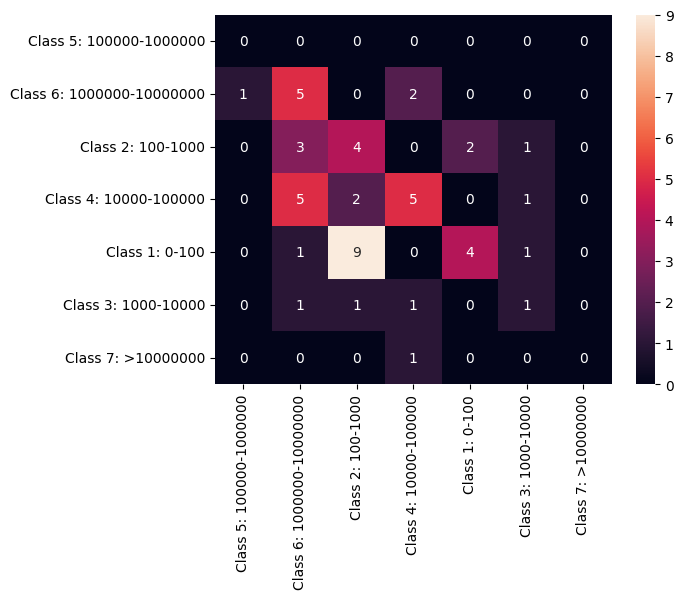

In [339]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Predict the labels for the test data
y_pred = pipeline.predict(X_test)

# Get the unique class labels
class_labels = y_train.unique()

# Compute and display the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=class_labels)

# Plot the confusion matrix with class labels
sns.heatmap(cm, annot=True, xticklabels=class_labels, yticklabels=class_labels)
plt.show()

In [340]:
from sklearn.metrics import classification_report

# Assuming you have separate X_test and y_test data
y_pred = pipeline.predict(X_test)
report = classification_report(y_test, y_pred, zero_division=1)

print(report)


                           precision    recall  f1-score   support

           Class 1: 0-100       0.67      0.27      0.38        15
        Class 2: 100-1000       0.25      0.40      0.31        10
      Class 3: 1000-10000       0.25      0.25      0.25         4
    Class 4: 10000-100000       0.56      0.38      0.45        13
  Class 5: 100000-1000000       0.00      1.00      0.00         0
Class 6: 1000000-10000000       0.33      0.62      0.43         8
       Class 7: >10000000       1.00      0.00      0.00         1

                 accuracy                           0.37        51
                macro avg       0.44      0.42      0.26        51
             weighted avg       0.48      0.37      0.38        51



the feature importances

In [341]:
# Get feature importances from our random forest model
importances = pipeline.named_steps['model'].feature_importances_

# Get the first 7 feature importances and their corresponding column names
top_features = zip(X_train.columns[:7], importances[:7])

# Summarize feature importance
for feature, importance in top_features:
    print('Feature: %s, Score: %.5f' % (feature, importance))

Feature: Date, Score: 0.20351
Feature: Location, Score: 0.00075
Feature: Disease, Score: 0.00113
Feature: Is death toll unknown, Score: 0.00050
Feature: BC/AD, Score: 0.00332
Feature: Disease Category, Score: 0.00374
